In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import seaborn as sns

In [2]:
train = pd.read_csv('D:/资料/数据/titanic_dataset.csv')

In [3]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500


In [4]:
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.381971,2.294882,23.877515,0.498854,0.385027,33.276075
std,0.486055,0.837836,17.590848,1.041658,0.865560,51.743642
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,7.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
survived    1309 non-null int64
pclass      1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1309 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 76.7+ KB


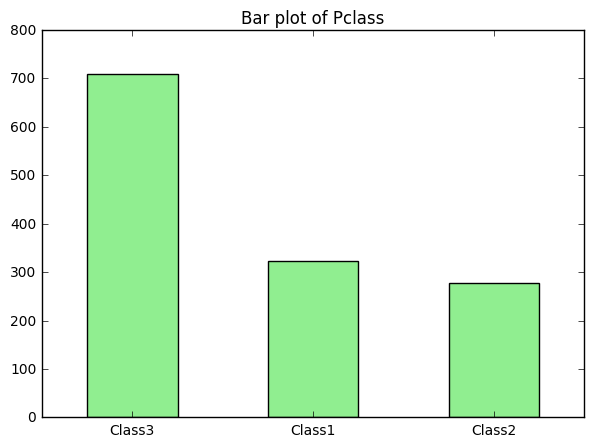

In [19]:
fig,ax = plt.subplots(figsize=(7,5))
train["pclass"].value_counts().plot(kind="bar",color = 'lightgreen')
ax.set_xticklabels(('Class3','Class1','Class2'),rotation = 'horizontal')
ax.set_title('Bar plot of Pclass')

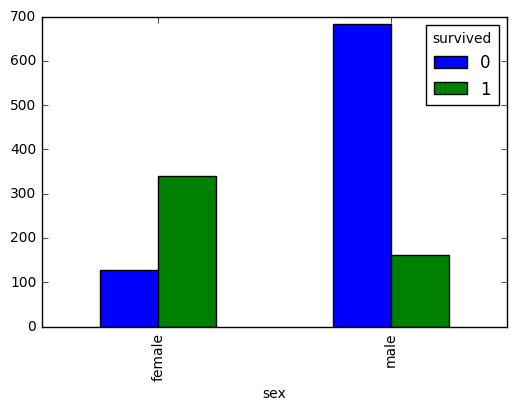

In [22]:
# 分类变量 作交叉表及条形图
pd.crosstab(train["sex"],train["survived"])
pd.crosstab(train["sex"],train["survived"]).plot(kind= 'bar')

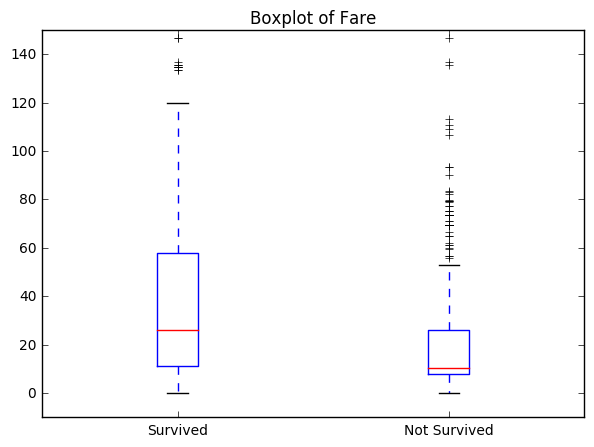

In [28]:
# 连续变量  作箱线图
fig, ax= plt.subplots(figsize=(7,5))
Fare1 = train.fare[train.survived == 1]
Fare0 = train.fare[train.survived == 0]
plt.boxplot((Fare1,Fare0),labels=('Survived','Not Survived'))
ax.set_ylim([-10,150])
ax.set_title("Boxplot of Fare")

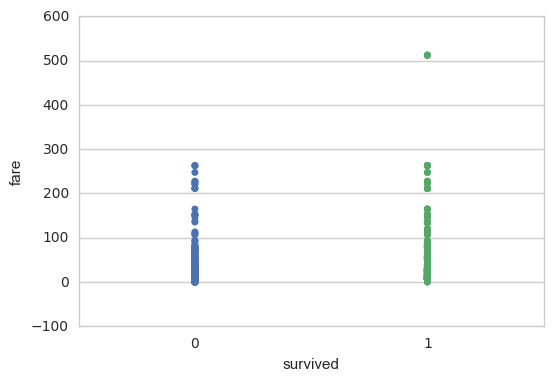

In [32]:
sns.stripplot(x="survived", y="fare", data=train);  # jitter 控制数据是否散开

In [33]:
titanic = sns.load_dataset("titanic")

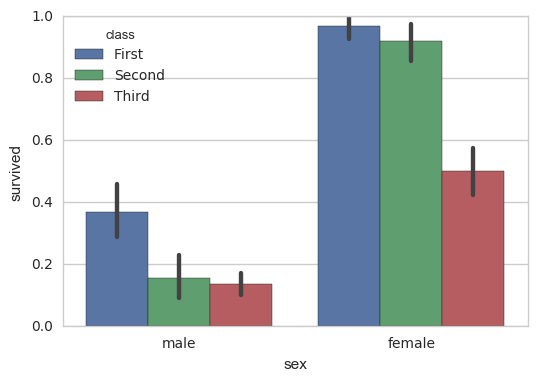

In [34]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

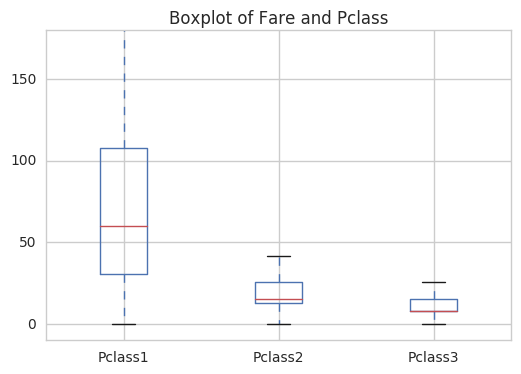

In [36]:
fig,ay = plt.subplots()
Farec1 = train.fare[train.pclass == 1]
Farec2 = train.fare[train.pclass == 2]
Farec3 = train.fare[train.pclass == 3]
plt.boxplot((Farec1,Farec2,Farec3),labels=("Pclass1","Pclass2","Pclass3"))
ay.set_ylim([-10,180])
ay.set_title("Boxplot of Fare and Pclass")

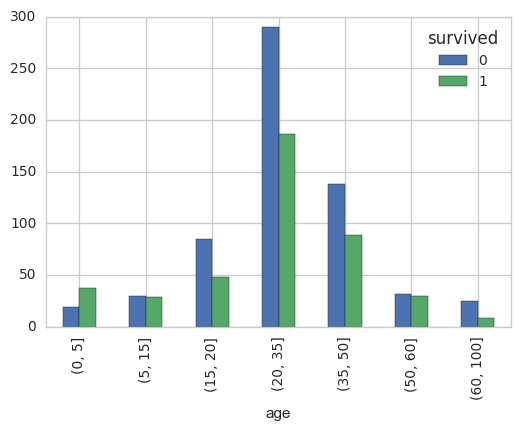

In [38]:
# 数据分箱
train.age=pd.cut(train.age,[0,5,15,20,35,50,60,100])
pd.crosstab(train.age,train.survived).plot(kind="bar")

In [39]:
train.age.value_counts()

(20, 35]     476
(35, 50]     227
(15, 20]     133
(50, 60]      62
(5, 15]       59
(0, 5]        56
(60, 100]     33
Name: age, dtype: int64

In [45]:
# 创建虚拟变量
dummy_sex = pd.get_dummies(train.sex, prefix='Sex')
dummy_sex.head()

,Sex_female,Sex_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [44]:
dummy_age = pd.get_dummies(train.age, prefix='age')
dummy_age.head()

,"age_(0, 5]","age_(5, 15]","age_(15, 20]","age_(20, 35]","age_(35, 50]","age_(50, 60]","age_(60, 100]"
0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [48]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
